# 1. Import Thư viện và Cấu hình

In [4]:
# Import thư viện
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Cấu hình hiển thị
%matplotlib inline
sns.set_style("whitegrid")
np.set_printoptions(suppress=True, precision=3)

warnings.filterwarnings('ignore')


# 2. Đọc và Tải Dữ liệu (Data Loading)

In [7]:
# Đọc dữ liệu
DATA_PATH = '../data/raw/ratings_Beauty.csv' 

print(f"Loading data from {DATA_PATH}")

try:
    raw_data = np.genfromtxt(DATA_PATH, delimiter=',', dtype=str, encoding='utf-8', skip_header=1)
    print("Data loaded successfully!")
    print(f"Shape: {raw_data.shape}")
except Exception as e:
    print(f"Error loading data: {e}")


Loading data from ../data/raw/ratings_Beauty.csv
Data loaded successfully!
Shape: (2023070, 4)


# 3. Data Preview

In [ ]:
# Tách các cột để dễ xử lý
user_ids = raw_data[:, 0]
product_ids = raw_data[:, 1]
ratings = raw_data[:, 2].astype(float)
timestamps = raw_data[:, 3]

print("--- Data Preview (First 5 rows) ---")
print(f"User IDs:    {user_ids[:5]}")
print(f"Product IDs: {product_ids[:5]}")
print(f"Ratings:     {ratings[:5]}")


--- Data Preview (First 5 rows) ---
User IDs:    ['A39HTATAQ9V7YF' 'A3JM6GV9MNOF9X' 'A1Z513UWSAAO0F' 'A1WMRR494NWEWV'
 'A3IAAVS479H7M7']
Product IDs: ['0205616461' '0558925278' '0558925278' '0733001998' '0737104473']
Ratings:     [5. 3. 5. 4. 1.]


# 4. Thống kê mô tả

In [8]:
# Thống kê mô tả
unique_users = np.unique(user_ids)
unique_products = np.unique(product_ids)

n_users = len(unique_users)
n_products = len(unique_products)
n_ratings = len(ratings)

print("--- Dataset Statistics ---")
print(f"Total Ratings: {n_ratings}")
print(f"Total Unique Users: {n_users}")
print(f"Total Unique Products: {n_products}")
print("-" * 30)
print(f"Min Rating: {np.min(ratings)}")
print(f"Max Rating: {np.max(ratings)}")
print(f"Average Rating: {np.mean(ratings):.2f}")
print(f"Median Rating: {np.median(ratings)}")


--- Dataset Statistics ---
Total Ratings: 2023070
Total Unique Users: 1210271
Total Unique Products: 249274
------------------------------
Min Rating: 1.0
Max Rating: 5.0
Average Rating: 4.15
Median Rating: 5.0


# 5. Phân phối của Ratings

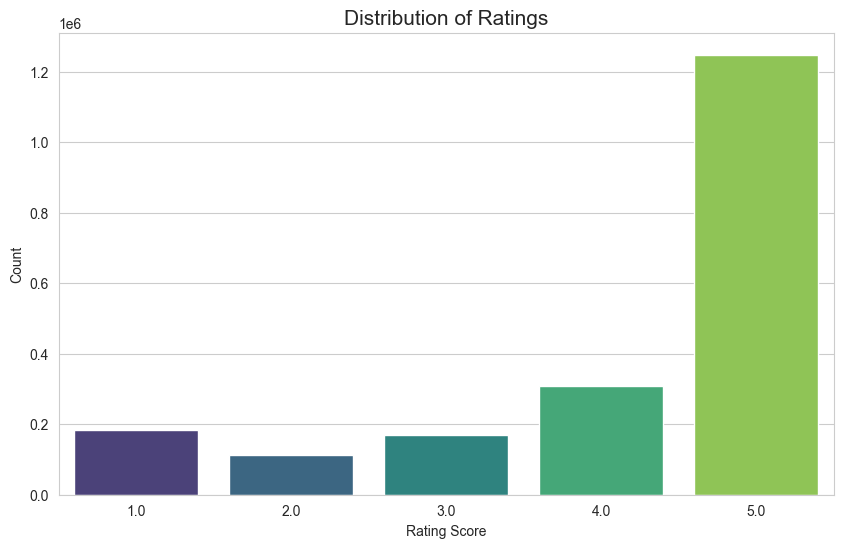

In [11]:
# Đếm số lượng từng loại rating
rating_values, rating_counts = np.unique(ratings, return_counts=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_values, y=rating_counts, palette="viridis")
plt.title("Distribution of Ratings", fontsize=15)
plt.xlabel("Rating Score")
plt.ylabel("Count")
plt.show()


# 6. Phân tích độ thưa của dữ liệu (Sparsity Analysis)

Matrix Sparsity: 99.9993%
Density: 0.0007%


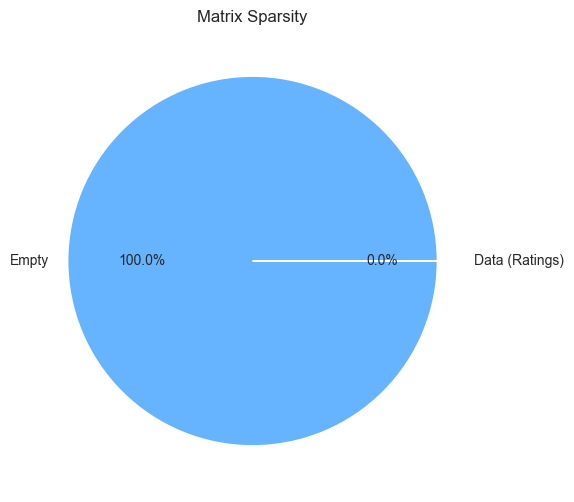

In [12]:
# Tính độ thưa
total_elements = n_users * n_products
sparsity = 1 - (n_ratings / total_elements)

print(f"Matrix Sparsity: {sparsity * 100:.4f}%")
print(f"Density: {(1 - sparsity) * 100:.4f}%")

# Trực quan hóa độ thưa (Pie Chart)
plt.figure(figsize=(6, 6))
plt.pie([1-sparsity, sparsity], labels=['Data (Ratings)', 'Empty'], 
        autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], explode=(0.1, 0))
plt.title("Matrix Sparsity")
plt.show()


# 7. Phân tích phân phối Long-Tail

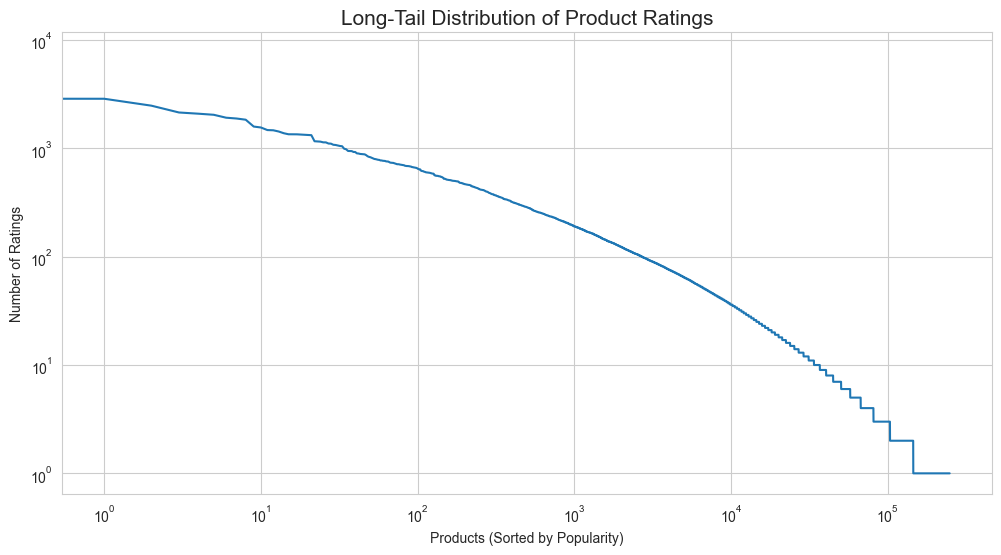

In [14]:
# Đếm số rating cho mỗi sản phẩm
_, product_counts = np.unique(product_ids, return_counts=True)

# Sắp xếp giảm dần để vẽ biểu đồ
sorted_product_counts = np.sort(product_counts)[::-1]

plt.figure(figsize=(12, 6))
plt.plot(sorted_product_counts)
plt.title("Long-Tail Distribution of Product Ratings", fontsize=15)
plt.xlabel("Products (Sorted by Popularity)")
plt.ylabel("Number of Ratings")
plt.xscale('log') # Dùng thang đo log để dễ nhìn phần đuôi
plt.yscale('log')
plt.show()


# 8. Phân tích theo Nguyên lý Pareto

--- PARETO PRINCIPLE VERIFICATION ---
Tổng số sản phẩm: 249274
Số lượng sản phẩm tạo ra 80% rating: 50122
Tỷ lệ: 20.11% số sản phẩm chiếm 80% tổng tương tác.
=> KẾT LUẬN: Dữ liệu phân phối đều hơn, tỷ lệ là 20.11/80.


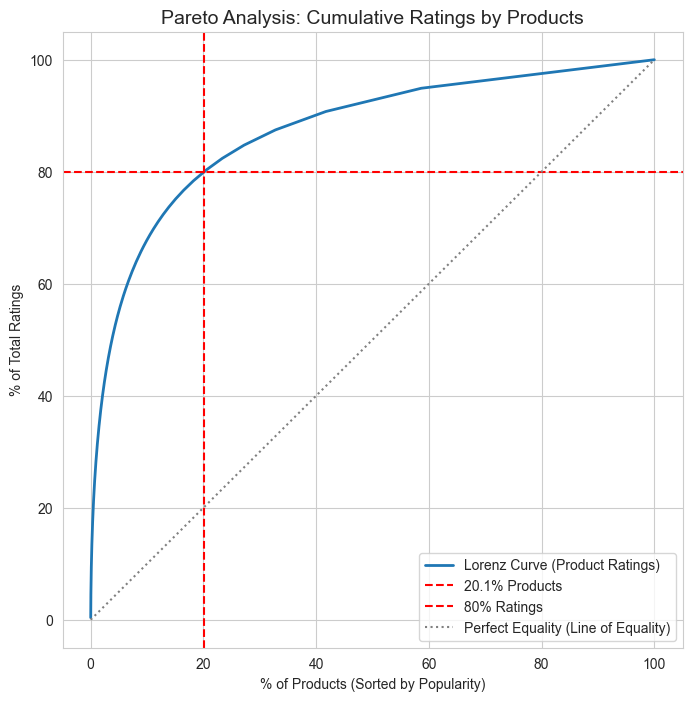

In [ ]:
# --- PARETO PRINCIPLE ANALYSIS ---

# 1. Đếm số lượng rating cho mỗi sản phẩm (Product Popularity)
_, product_counts = np.unique(product_ids, return_counts=True)

# 2. Sắp xếp số lượng rating từ Cao xuống Thấp
sorted_indices = np.argsort(product_counts)[::-1]
sorted_counts = product_counts[sorted_indices]

# 3. Tính tổng tích lũy (Cumulative Sum) - Vectorization
cumulative_ratings = np.cumsum(sorted_counts)
total_ratings = cumulative_ratings[-1]
cumulative_percent = (cumulative_ratings / total_ratings) * 100

# 4. Xác định mốc 80% rating nằm ở đâu
index_80_percent = np.searchsorted(cumulative_percent, 80.0)

# 5. Tính toán tỷ lệ sản phẩm
num_products_top_80 = index_80_percent + 1
total_products = len(sorted_counts)
product_percent_making_80 = (num_products_top_80 / total_products) * 100

# --- KẾT QUẢ ---
print("--- PARETO PRINCIPLE VERIFICATION ---")
print(f"Tổng số sản phẩm: {total_products}")
print(f"Số lượng sản phẩm tạo ra 80% rating: {num_products_top_80}")
print(f"Tỷ lệ: {product_percent_making_80:.2f}% số sản phẩm chiếm 80% tổng tương tác.")

if product_percent_making_80 <= 20:
    print("=> KẾT LUẬN: Dữ liệu tuân thủ (hoặc gắt hơn) Nguyên lý Pareto (80/20).")
else:
    print(f"=> KẾT LUẬN: Dữ liệu phân phối đều hơn, tỷ lệ là {product_percent_making_80:.2f}/80.")

# 6. Vẽ biểu đồ Pareto (Lorenz Curve)
plt.figure(figsize=(8, 8))
x_axis = (np.arange(total_products) + 1) / total_products * 100
y_axis = cumulative_percent

plt.plot(x_axis, y_axis, linewidth=2, label='Lorenz Curve (Product Ratings)')
plt.axvline(x=product_percent_making_80, color='r', linestyle='--', label=f'{product_percent_making_80:.1f}% Products')
plt.axhline(y=80, color='r', linestyle='--', label='80% Ratings')
plt.plot([0, 100], [0, 100], color='gray', linestyle=':', label='Perfect Equality (Line of Equality)')

plt.title("Pareto Analysis: Cumulative Ratings by Products", fontsize=14)
plt.xlabel("% of Products (Sorted by Popularity)")
plt.ylabel("% of Total Ratings")
plt.legend()
plt.grid(True)
plt.show()


# 9. Phân tích và Nhận xét

1.  **Thống kê tổng quan**:
    *   Có **1,210,271** người dùng (users) và **249,274** sản phẩm (products) khác nhau.
    *   Điểm đánh giá (rating) nằm trong khoảng từ 1.0 đến 5.0, với điểm trung bình là **4.15**. Điều này cho thấy hầu hết các đánh giá đều khá tích cực.

2.  **Phân phối của Ratings**:
    *   Biểu đồ cho thấy phần lớn các sản phẩm được đánh giá **5 sao**, chiếm số lượng áp đảo. Điều này củng cố nhận định rằng người dùng có xu hướng để lại đánh giá khi họ rất hài lòng.
    *   Số lượng đánh giá 1, 2, và 3 sao thấp hơn đáng kể.

3.  **Độ thưa của dữ liệu (Sparsity)**:
    *   Ma trận User-Item cực kỳ thưa, với độ thưa lên đến **99.9993%**.
    *   Điều này có nghĩa là chỉ có khoảng **0.0007%** các cặp (user, item) có sự tương tác (rating). Đây là một thách thức lớn đối với các hệ thống gợi ý, đòi hỏi các thuật toán phải xử lý hiệu quả ma trận thưa.

4.  **Phân phối Long-Tail**:
    *   Biểu đồ phân phối cho thấy một "cái đuôi dài" (long-tail), đặc trưng của dữ liệu thương mại điện tử.
    *   **Insight**: Một số ít sản phẩm "bom tấn" (phần đầu của biểu đồ) nhận được rất nhiều lượt đánh giá, trong khi phần lớn các sản phẩm còn lại (phần đuôi dài) chỉ có rất ít tương tác. Điều này cho thấy thị trường bị chi phối bởi một vài sản phẩm phổ biến.

6.  **Phân tích theo Nguyên lý Pareto (80/20)**:
    *   Kết quả cho thấy chỉ **20.11%** số sản phẩm hàng đầu đã tạo ra **80%** tổng số lượt đánh giá.
    *   **Kết luận**: Dữ liệu này tuân thủ chặt chẽ Nguyên lý Pareto. Một nhóm nhỏ các sản phẩm phổ biến nhất đang chiếm phần lớn sự chú ý và tương tác của người dùng.

## Các Insights chính

*   **Dữ liệu rất tích cực nhưng cực kỳ thưa**: Người dùng có xu hướng đánh giá cao (trung bình 4.15, chủ yếu là 5 sao), nhưng mỗi người chỉ đánh giá một phần rất nhỏ trong tổng số sản phẩm. Mô hình sẽ khó học được "khẩu vị tiêu cực" (người dùng ghét gì) để tránh gợi ý sai, vì các điểm 1-2 quá ít. Hầu hết User chỉ mua 1-2 lần rồi thôi, nên cần phải lọc dữ liệu (ví dụ như giữ lại user có ít nhất 5-10 ratings). Nếu giữ nguyên 1.2 triệu user để chạy ma trận, thuật toán sẽ không học được gì (vì quá ít dữ liệu mẫu) và có thể gây tràn RAM.
*   **Thị trường bị chi phối bởi sản phẩm phổ biến**: Một số ít sản phẩm chiếm phần lớn sự quan tâm của người dùng, trong khi đại đa số các sản phẩm khác ít được biết đến. Hệ thống gợi ý sẽ có xu hướng chỉ recommend các sản phẩm "Top hit" (nằm trong nhóm 20%) cho tất cả mọi người, bỏ qua các sản phẩm ngách (Long-tail) nếu không có kỹ thuật xử lý (như Normalization). Đây là cơ hội để hệ thống gợi ý có thể giới thiệu các sản phẩm ở "đuôi dài" (long-tail) đến những người dùng phù hợp.
*   **Thách thức về tính toán**: Độ thưa cao đòi hỏi các phương pháp lưu trữ và tính toán ma trận phải hiệu quả để tránh lãng phí bộ nhớ và thời gian.